# Library Imports

In [11]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
from pymc import math as pm_math
from scipy.stats import halfnorm, skewnorm

# Model Specification
## Simulated Data
$$ X \sim N(1,1) $$
$$ U \sim HN(0, \sigma_u^2) $$
$$ Y \sim SN(\xi, \sigma_v^2, \lambda)$$
$$ \xi = \alpha + \beta X - U $$
$$ \alpha = 5, \beta = 2 $$
## Priors
$$ \alpha \sim N(\mu_\alpha, \sigma_\alpha^2) $$
$$ \beta \sim N(\mu_\beta, \sigma_\beta^2) $$
$$ \sigma_v^2 \sim IG(\alpha_v, \beta_v) $$
$$ \sigma_u^2 \sim IG(\alpha_u, \beta_u) $$
$$ \lambda \sim TN(\mu_\lambda, \sigma_\lambda^2; a, b)$$


# Simulate Data

In [2]:
np.random.seed(123)

# Parameters 
n = 50
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -0.5

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

In [3]:
data.head()

X         Y
0 -0.085631  3.444481
1  1.997345  6.248438
2  1.282978  3.450195
3 -0.506295 -1.071731
4  0.421400  7.164607

# Simulation 1


In [5]:
with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', alpha=4, beta=3)
    sigma_v = pm.InverseGamma('sigma_v', alpha=2, beta=3)
    lam = pm.Normal('lam', mu=-5, sigma=5)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 24 seconds.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    3.22  0.97    1.61     5.10       0.02     0.01   3831.61   6487.02   
beta     2.33  0.18    2.00     2.67       0.00     0.00  15006.77  14444.37   
lam      1.48  2.22   -2.09     5.79       0.06     0.04   1362.79   3157.27   
sigma_u  0.99  0.44    0.29     1.78       0.01     0.01   1044.34   3344.41   
sigma_v  1.78  0.34    1.19     2.41       0.00     0.00   8033.40  12897.58   
U[0]     0.63  0.54    0.00     1.60       0.01     0.01   4431.94   5695.59   
U[1]     1.07  0.83    0.00     2.59       0.02     0.01   1828.20   6749.25   
U[2]     1.47  1.08    0.00     3.37       0.03     0.01   1182.78   4859.51   
U[3]     1.60  1.18    0.00     3.70       0.04     0.01   1205.66   3683.57   
U[4]     0.43  0.39    0.00     1.15       0.00     0.00   9075.13   7996.02   
U[5]     0.68  0.58    0.00     1.75       0.01     0.01   4620.75   8783.02   
U[6]     0.49  0.44    0.00     1.28       0.01     0.00   6178.26   7843.02   
U[7]     0.81  0.67    0.00     2.04       0.01     0.01   2844.14   6766.04   
U[8]     0.56  0.49    0.00     1.45       0.01     0.00   6224.76   7690.59   
U[9]     0.72  0.60    0.00     1.81       0.01     0.01   3813.99   8691.92   
U[10]    0.61  0.53    0.00     1.58       0.01     0.01   5362.46   6915.25   
U[11]    0.76  0.62    0.00     1.91       0.01     0.01   3322.10   7080.19   
U[12]    0.69  0.58    0.00     1.75       0.01     0.01   4765.19   6733.68   
U[13]    0.57  0.50    0.00     1.50       0.01     0.00   6225.28   8289.77   
U[14]    0.63  0.54    0.00     1.63       0.01     0.01   5676.57   7976.05   
U[15]    0.79  0.65    0.00     1.98       0.01     0.01   3086.09   7810.55   
U[16]    1.30  0.98    0.00     3.04       0.03     0.01   1386.37   5724.16   
U[17]    0.51  0.45    0.00     1.33       0.01     0.01   6207.80   7279.91   
U[18]    0.97  0.76    0.00     2.34       0.02     0.01   1938.64   7072.13   
U[19]    0.65  0.56    0.00     1.68       0.01     0.01   5115.04   7740.09   
U[20]    0.49  0.44    0.00     1.29       0.00     0.00   8120.04   9013.82   
U[21]    0.70  0.59    0.00     1.79       0.01     0.01   4334.33   8222.15   
U[22]    0.77  0.63    0.00     1.93       0.01     0.01   2987.77   6584.49   
U[23]    0.76  0.63    0.00     1.90       0.01     0.01   3636.24   7026.38   
U[24]    0.84  0.69    0.00     2.10       0.01     0.01   2694.88   7304.18   
U[25]    1.04  0.81    0.00     2.52       0.02     0.01   1692.20   6070.77   
U[26]    0.60  0.52    0.00     1.56       0.01     0.01   6658.53   7734.64   
U[27]    0.60  0.53    0.00     1.57       0.01     0.01   6093.75   7685.97   
U[28]    0.71  0.60    0.00     1.81       0.01     0.01   3880.07   7891.56   
U[29]    0.76  0.63    0.00     1.91       0.01     0.01   3080.98   6569.20   
U[30]    0.77  0.64    0.00     1.93       0.01     0.01   3526.51   9051.90   
U[31]    0.90  0.74    0.00     2.26       0.02     0.01   2268.29   6716.65   
U[32]    1.20  0.92    0.00     2.88       0.02     0.01   1474.72   6317.90   
U[33]    0.66  0.56    0.00     1.68       0.01     0.01   5348.19   8215.29   
U[34]    0.74  0.62    0.00     1.88       0.01     0.01   3960.94   6475.92   
U[35]    1.63  1.19    0.00     3.73       0.04     0.01   1228.50   4259.04   
U[36]    0.56  0.49    0.00     1.44       0.01     0.01   5780.72   7922.84   
U[37]    1.38  1.02    0.00     3.18       0.03     0.01   1326.82   5013.60   
U[38]    1.13  0.88    0.00     2.70       0.02     0.01   1471.14   5342.96   
U[39]    0.62  0.54    0.00     1.62       0.01     0.01   6406.63   8814.65   
U[40]    0.71  0.60    0.00     1.83       0.01     0.01   3532.13   6659.99   
U[41]    0.60  0.53    0.00     1.56       0.01     0.01   6521.31   8896.88   
U[42]    0.58  0.51    0.00     1.49       0.01     0.01   6334.86   8163.77   
U[43]    0.73  0.61    0.00     1.85       0.01     0.01   4099.88   6804.95   
U[44]    

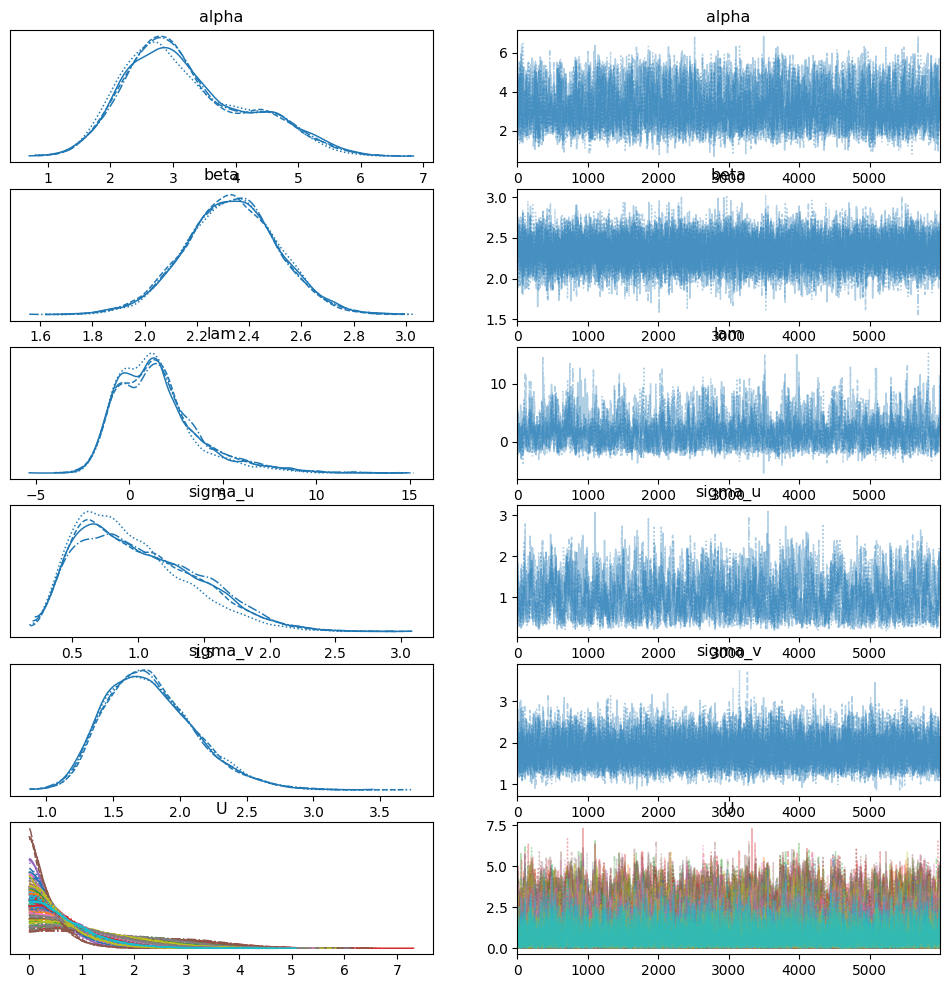

In [6]:
az.plot_trace(trace)
az.summary(trace, round_to=2)

In [7]:
def compute_metrics(samples, true_value):
    rmse = np.sqrt(np.mean((samples - true_value)**2))
    ave = np.mean(np.abs(samples - true_value))
    return ave, rmse

# True values
true_vals = {
    "alpha": 5,
    "beta": 2,
    "sigma_u": 1,
    "sigma_v": 1.5,
    "lam": -0.5
}

# Posterior samples (assumes you've run sampling and have `trace`)
posterior = trace.posterior.stack(draws=("chain", "draw"))
metrics = {}

for param in true_vals:
    samples = posterior[param].values
    ave, rmse = compute_metrics(samples, true_vals[param])
    metrics[param] = {"AVE": ave, "RMSE": rmse}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics).T
metrics_df

AVE      RMSE
alpha    1.816965  2.028203
beta     0.336929  0.376920
sigma_u  0.361279  0.437791
sigma_v  0.339394  0.439107
lam      2.204324  2.971480

# Simulation 2
$$ \lambda = -1 $$

## n = 50

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 13 seconds.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.46  0.55    3.41     5.46       0.01     0.00   4919.13   8817.55   
beta     2.29  0.17    1.96     2.61       0.00     0.00  22869.26  15688.55   
sigma_u  0.84  0.36    0.31     1.53       0.01     0.01   1807.35   3643.71   
sigma_v  1.73  0.33    1.13     2.33       0.00     0.00   7006.11   7578.74   
lam     -1.20  0.65   -2.27    -0.00       0.01     0.00   9096.84   8067.18   
U[0]     0.58  0.49    0.00     1.49       0.01     0.00   6289.70   6533.38   
U[1]     0.93  0.77    0.00     2.36       0.01     0.01   3209.54   6904.46   
U[2]     1.00  0.82    0.00     2.51       0.01     0.01   3445.80   6331.83   
U[3]     1.17  0.95    0.00     2.97       0.02     0.01   2675.69   5708.13   
U[4]     0.33  0.30    0.00     0.87       0.00     0.00  13659.97   9481.78   
U[5]     0.60  0.50    0.00     1.50       0.01     0.01   6497.34   7863.05   
U[6]     0.41  0.36    0.00     1.08       0.00     0.00   9702.53   7829.71   
U[7]     0.82  0.68    0.00     2.07       0.01     0.01   3936.91   7784.59   
U[8]     0.52  0.45    0.00     1.34       0.00     0.00   6592.11   7143.35   
U[9]     0.72  0.60    0.00     1.83       0.01     0.01   4597.31   7514.11   
U[10]    0.54  0.46    0.00     1.40       0.01     0.00   7094.90   8819.07   
U[11]    0.71  0.59    0.00     1.80       0.01     0.01   5250.53   8188.38   
U[12]    0.63  0.52    0.00     1.59       0.01     0.01   5680.54   7591.94   
U[13]    0.53  0.44    0.00     1.36       0.00     0.00   7475.29   8536.57   
U[14]    0.61  0.52    0.00     1.56       0.01     0.01   6335.29   8539.77   
U[15]    0.66  0.55    0.00     1.66       0.01     0.01   5430.46   7441.55   
U[16]    0.95  0.78    0.00     2.38       0.01     0.01   3710.49   7351.68   
U[17]    0.44  0.38    0.00     1.13       0.00     0.00   9871.13   8513.44   
U[18]    0.89  0.73    0.00     2.25       0.01     0.01   3609.22   6338.19   
U[19]    0.70  0.57    0.00     1.74       0.01     0.01   4381.42   7021.69   
U[20]    0.42  0.37    0.00     1.09       0.00     0.00  11060.60   9319.25   
U[21]    0.64  0.53    0.00     1.60       0.01     0.01   5821.65   7673.97   
U[22]    0.64  0.53    0.00     1.61       0.01     0.01   5752.29   7995.71   
U[23]    0.69  0.57    0.00     1.74       0.01     0.01   5130.68   8387.16   
U[24]    0.82  0.68    0.00     2.08       0.01     0.01   4326.20   7573.40   
U[25]    0.77  0.63    0.00     1.94       0.01     0.01   4367.24   7400.95   
U[26]    0.56  0.47    0.00     1.44       0.01     0.00   6917.10   8149.48   
U[27]    0.52  0.44    0.00     1.32       0.00     0.00   7271.35   7855.84   
U[28]    0.63  0.53    0.00     1.60       0.01     0.01   5763.51   8218.00   
U[29]    0.68  0.57    0.00     1.72       0.01     0.01   5335.71   8131.62   
U[30]    0.72  0.60    0.00     1.81       0.01     0.01   4574.02   8010.77   
U[31]    0.75  0.64    0.00     1.93       0.01     0.01   4749.68   7465.15   
U[32]    0.89  0.72    0.00     2.22       0.01     0.01   3716.69   7149.43   
U[33]    0.58  0.49    0.00     1.47       0.01     0.00   7272.86   8609.53   
U[34]    0.66  0.55    0.00     1.66       0.01     0.01   5237.06   7100.95   
U[35]    0.99  0.81    0.00     2.50       0.01     0.01   3482.70   6856.79   
U[36]    0.51  0.43    0.00     1.28       0.00     0.00   7643.11   8282.49   
U[37]    1.03  0.86    0.00     2.66       0.02     0.01   3017.39   6161.47   
U[38]    0.95  0.78    0.00     2.40       0.01     0.01   3431.43   6139.84   
U[39]    0.55  0.46    0.00     1.39       0.01     0.00   7083.02   7366.45   
U[40]    0.66  0.56    0.00     1.69       0.01     0.01   5679.86   8851.63   
U[41]    0.53  0.45    0.00     1.36       0.00     0.00   7908.11   9081.13   
U[42]    0.56  0.47    0.00     1.41       0.01     0.00   7137.81   7984.57   
U[43]    0.64  0.54    0.00     1.64       0.01     0.01   5154.71   6959.96   
U[44]    

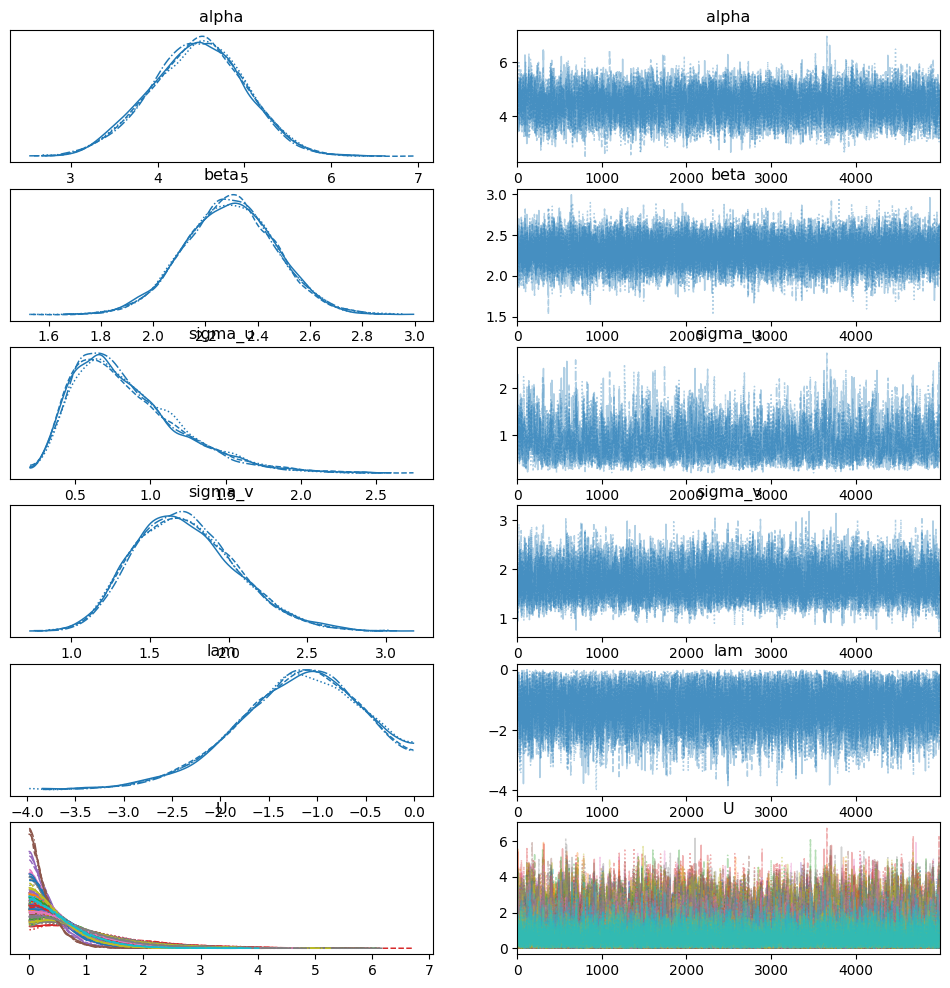

In [35]:
np.random.seed(123)

# Parameters 
n = 50
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -1

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(5000, tune=1000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

## n = 100

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 27 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    5.15  0.76    3.63     6.25       0.02     0.01   1784.34   3798.52   
beta     1.96  0.12    1.74     2.18       0.00     0.00   4943.16   6442.09   
lam     -1.36  2.84   -6.44     4.75       0.10     0.10    897.68    731.27   
sigma_u  1.03  0.43    0.33     1.80       0.02     0.01    371.13    850.81   
sigma_v  1.49  0.35    0.86     2.13       0.01     0.00    786.79   1357.00   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[95]    1.76  1.28    0.00     4.06       0.06     0.03    486.60   1157.07   
U[96]    1.17  0.86    0.00     2.72       0.03     0.02    696.64   1980.57   
U[97]    0.54  0.43    0.00     1.32       0.01     0.00   4013.79   7307.55   
U[98]    0.62  0.48    0.00     1.50       0.01     0.00   2588.93   7127.53   
U[99]    0.66  0.51    0.00     1.60       0.01     0.01   2333.58   7428.45   

         r_hat  
alpha     1.00  
beta      1.00  
lam       1.00  
sigma_u   1.01  
sigma_v   1.01  
...        ...  
U[95]     1.01  
U[96]     1.01  
U[97]     1.00  
U[98]     1.00  
U[99]     1.00  

[105 rows x 9 columns]

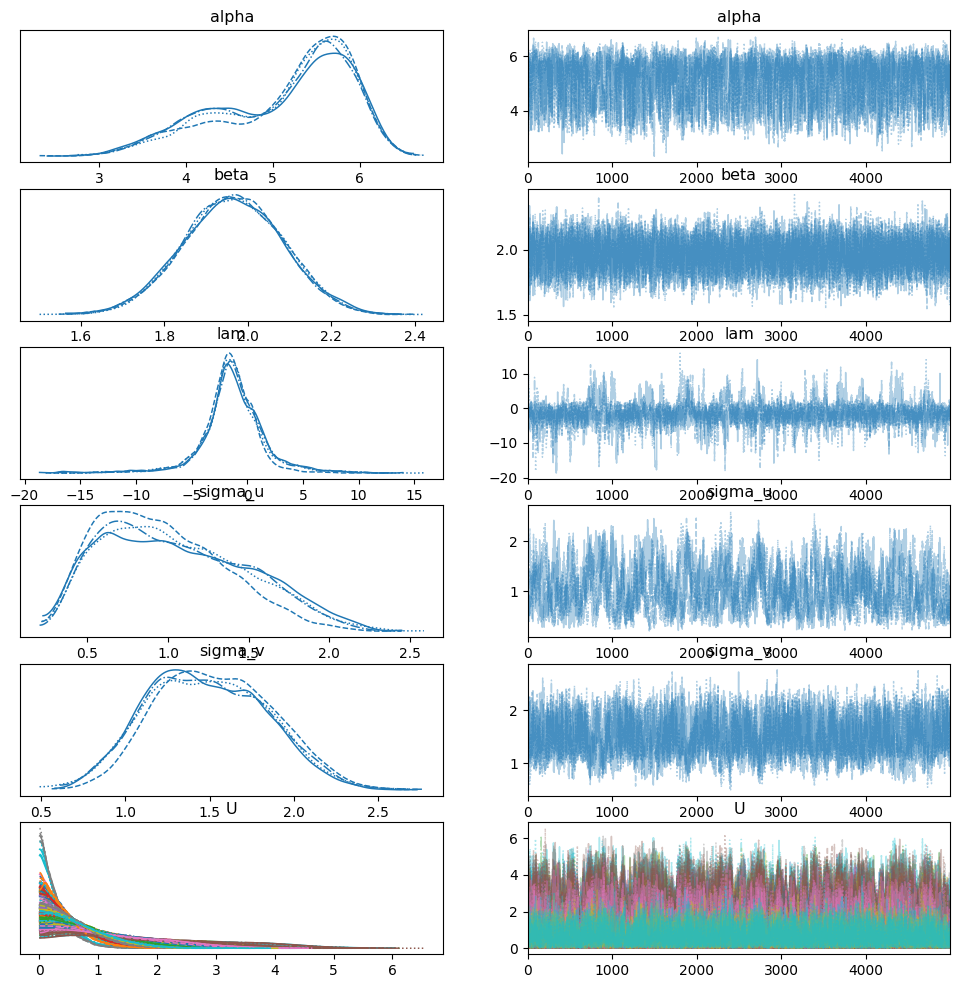

In [30]:
np.random.seed(123)

# Parameters 
n = 100
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -1

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2, 3)
    lam = pm.Normal('lam', mu=-5, sigma=5)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(5000, tune=1000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

# Simulation 3

$$ \lambda = -1.5 $$

n = 50

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 17 seconds.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.44  0.52    3.42     5.38       0.01     0.00   5007.71   8797.06   
beta     2.26  0.16    1.95     2.56       0.00     0.00  22530.69  17188.43   
sigma_u  0.88  0.38    0.28     1.59       0.01     0.01   1904.49   3242.57   
sigma_v  1.67  0.33    1.09     2.29       0.00     0.00   5059.14   5459.87   
lam     -1.43  0.72   -2.67    -0.05       0.01     0.00   9962.02   9614.26   
U[0]     0.61  0.50    0.00     1.55       0.01     0.00   6694.63   9580.80   
U[1]     1.06  0.85    0.00     2.65       0.02     0.01   3173.17   5582.24   
U[2]     1.02  0.83    0.00     2.60       0.01     0.01   3387.98   5794.28   
U[3]     1.30  1.06    0.00     3.33       0.02     0.02   2742.84   4762.80   
U[4]     0.31  0.28    0.00     0.82       0.00     0.00  16162.77  11147.18   
U[5]     0.58  0.48    0.00     1.47       0.01     0.00   6888.67  10201.75   
U[6]     0.40  0.35    0.00     1.05       0.00     0.00  12757.41  10248.88   
U[7]     0.96  0.78    0.00     2.42       0.01     0.01   3185.47   6857.63   
U[8]     0.55  0.46    0.00     1.38       0.00     0.00   8042.69   9523.46   
U[9]     0.81  0.66    0.00     2.01       0.01     0.01   4323.07   7557.30   
U[10]    0.54  0.45    0.00     1.37       0.00     0.00   7836.84   9702.01   
U[11]    0.77  0.63    0.00     1.93       0.01     0.01   4814.64   9138.91   
U[12]    0.64  0.53    0.00     1.59       0.01     0.01   5797.17  10753.45   
U[13]    0.55  0.46    0.00     1.42       0.01     0.00   6890.61   9493.46   
U[14]    0.68  0.56    0.00     1.72       0.01     0.01   5785.44  10444.82   
U[15]    0.65  0.53    0.00     1.63       0.01     0.01   5478.47   9920.15   
U[16]    0.97  0.79    0.00     2.46       0.01     0.01   3538.20   6570.02   
U[17]    0.43  0.37    0.00     1.11       0.00     0.00  11086.89   9411.29   
U[18]    1.02  0.83    0.00     2.58       0.02     0.01   3018.71   5957.32   
U[19]    0.79  0.64    0.00     1.98       0.01     0.01   4503.38   7972.57   
U[20]    0.41  0.35    0.00     1.05       0.00     0.00  11841.19  10212.47   
U[21]    0.65  0.54    0.00     1.64       0.01     0.01   6000.75   9813.08   
U[22]    0.63  0.52    0.00     1.58       0.01     0.00   5545.90   9156.72   
U[23]    0.73  0.60    0.00     1.83       0.01     0.01   4838.20   9552.66   
U[24]    0.95  0.77    0.00     2.39       0.01     0.01   3314.73   6277.34   
U[25]    0.76  0.62    0.00     1.90       0.01     0.01   4611.17   8623.47   
U[26]    0.59  0.48    0.00     1.45       0.01     0.00   7429.86  10318.52   
U[27]    0.51  0.43    0.00     1.29       0.00     0.00   7621.42   7942.75   
U[28]    0.63  0.52    0.00     1.58       0.01     0.01   6397.20  10074.59   
U[29]    0.72  0.58    0.00     1.79       0.01     0.01   5453.75   9645.54   
U[30]    0.77  0.63    0.00     1.94       0.01     0.01   4837.16   8361.48   
U[31]    0.78  0.65    0.00     1.97       0.01     0.01   4605.43   8198.57   
U[32]    0.92  0.74    0.00     2.29       0.01     0.01   3874.59   7417.74   
U[33]    0.57  0.48    0.00     1.43       0.01     0.00   6900.86   9349.52   
U[34]    0.67  0.55    0.00     1.69       0.01     0.01   5936.45   9871.38   
U[35]    0.97  0.78    0.00     2.43       0.01     0.01   3345.84   6546.32   
U[36]    0.52  0.43    0.00     1.30       0.00     0.00   8740.55   9797.67   
U[37]    1.15  0.94    0.00     2.92       0.02     0.01   3075.61   5163.54   
U[38]    1.06  0.86    0.00     2.69       0.02     0.01   3133.96   6247.94   
U[39]    0.53  0.43    0.00     1.31       0.00     0.00   8026.31  10202.06   
U[40]    0.70  0.57    0.00     1.76       0.01     0.01   5155.10   8171.33   
U[41]    0.52  0.44    0.00     1.33       0.00     0.00   8640.36   9992.59   
U[42]    0.60  0.49    0.00     1.50       0.01     0.00   7166.40  10166.40   
U[43]    0.66  0.54    0.00     1.65       0.01     0.01   5355.46   8805.68   
U[44]    

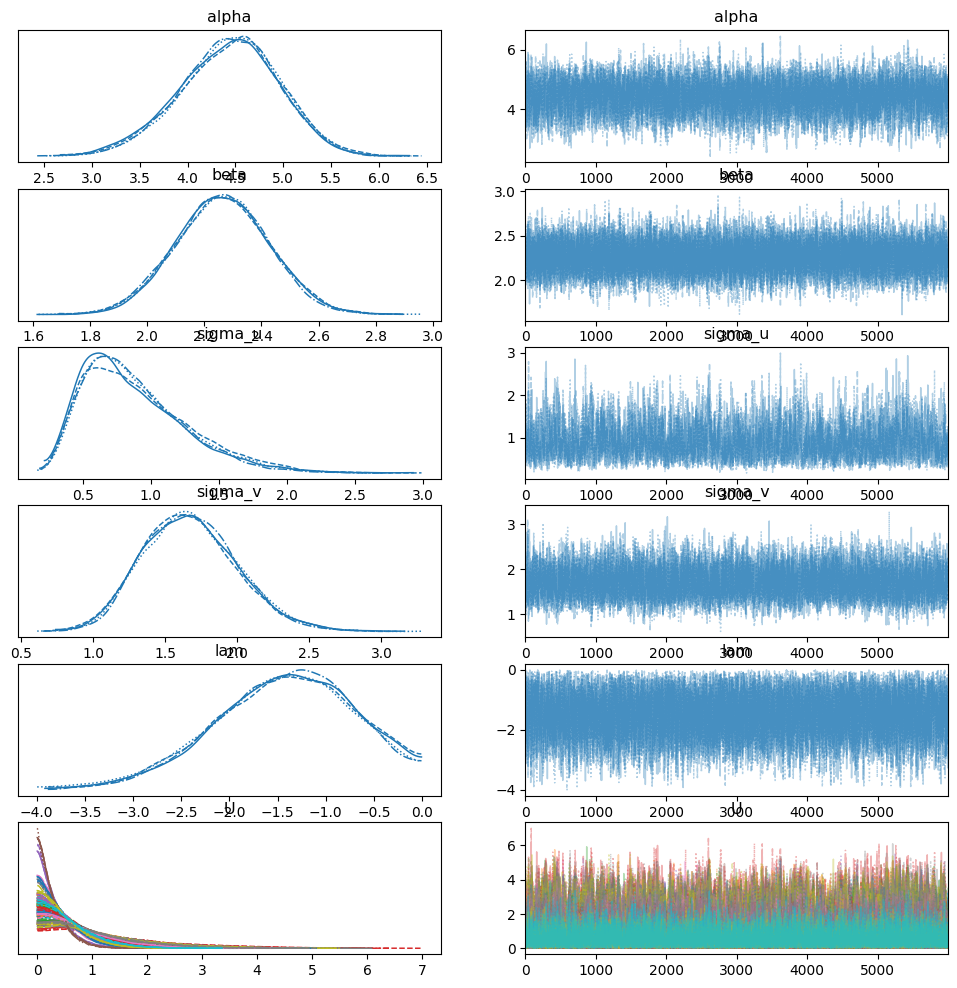

In [38]:
np.random.seed(123)

# Parameters 
n = 50
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -1.5

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

n = 100

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 25 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    5.23  0.33    4.60     5.81       0.01     0.00   1747.30   5739.10   
beta     1.98  0.10    1.79     2.17       0.00     0.00  11032.10  14926.23   
sigma_u  0.94  0.38    0.33     1.64       0.02     0.01    433.58   1097.09   
sigma_v  1.44  0.27    0.90     1.92       0.01     0.00    813.02   1236.46   
lam     -1.91  0.78   -3.41    -0.45       0.01     0.01   5920.04   6309.94   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[95]    1.54  1.13    0.00     3.62       0.05     0.02    621.05   1768.39   
U[96]    1.10  0.80    0.00     2.56       0.03     0.01    854.30   2939.71   
U[97]    0.47  0.37    0.00     1.15       0.01     0.00   4558.92   7412.38   
U[98]    0.52  0.41    0.00     1.27       0.01     0.00   3989.10   6659.27   
U[99]    0.60  0.47    0.00     1.45       0.01     0.00   2975.58   6542.54   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.01  
lam       1.00  
...        ...  
U[95]     1.01  
U[96]     1.01  
U[97]     1.00  
U[98]     1.00  
U[99]     1.00  

[105 rows x 9 columns]

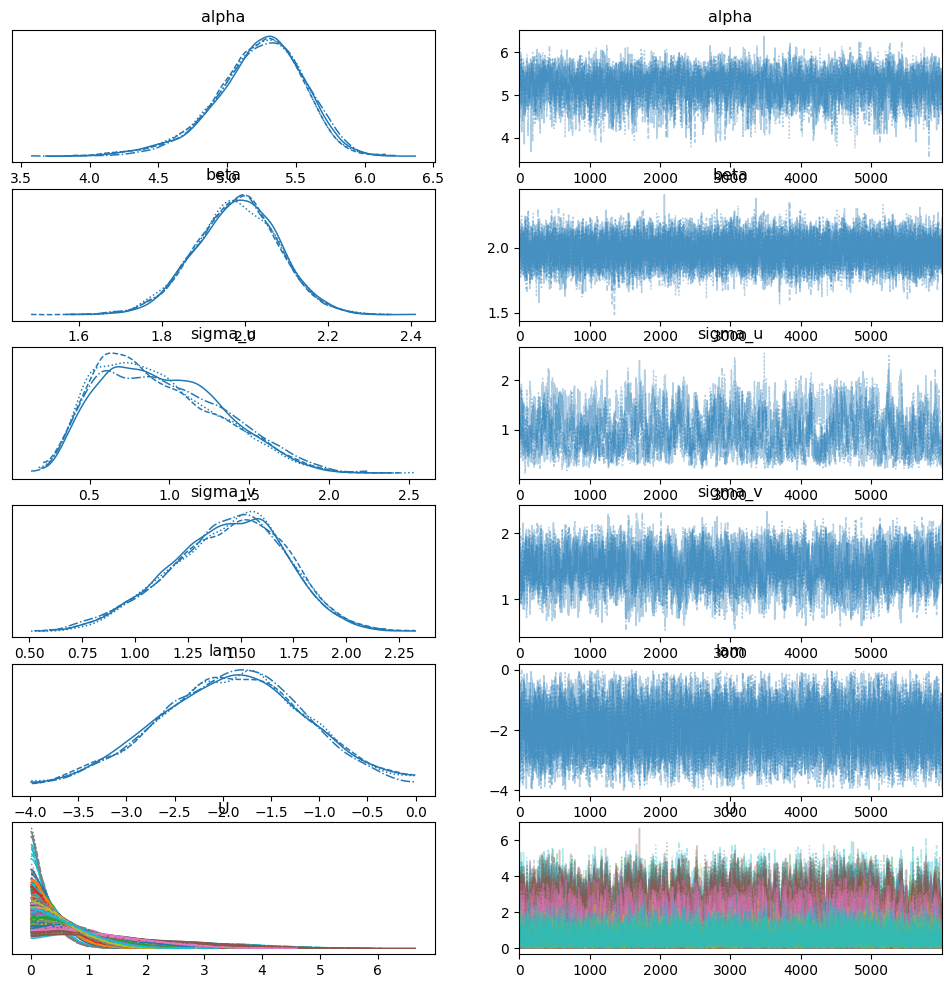

In [39]:
np.random.seed(123)

# Parameters 
n = 100
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -1.5

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

n = 200

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 41 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.91  0.26    4.41     5.41       0.01     0.00   2325.75   5553.97   
beta     2.03  0.08    1.88     2.18       0.00     0.00  19380.11  17135.85   
sigma_u  0.87  0.34    0.34     1.50       0.02     0.01    402.16   1066.79   
sigma_v  1.52  0.25    1.00     1.93       0.01     0.00    622.47   1413.19   
lam     -1.77  0.60   -2.94    -0.58       0.01     0.01   2851.66   2728.70   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[195]   0.60  0.47    0.00     1.45       0.01     0.01   2733.50   6824.58   
U[196]   0.69  0.53    0.00     1.67       0.01     0.01   1821.16   5918.36   
U[197]   0.49  0.39    0.00     1.21       0.01     0.00   4073.10   9158.10   
U[198]   0.68  0.52    0.00     1.63       0.01     0.01   1982.46   6922.91   
U[199]   0.69  0.53    0.00     1.65       0.01     0.01   1796.06   5968.15   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.01  
lam       1.00  
...        ...  
U[195]    1.00  
U[196]    1.00  
U[197]    1.00  
U[198]    1.00  
U[199]    1.00  

[205 rows x 9 columns]

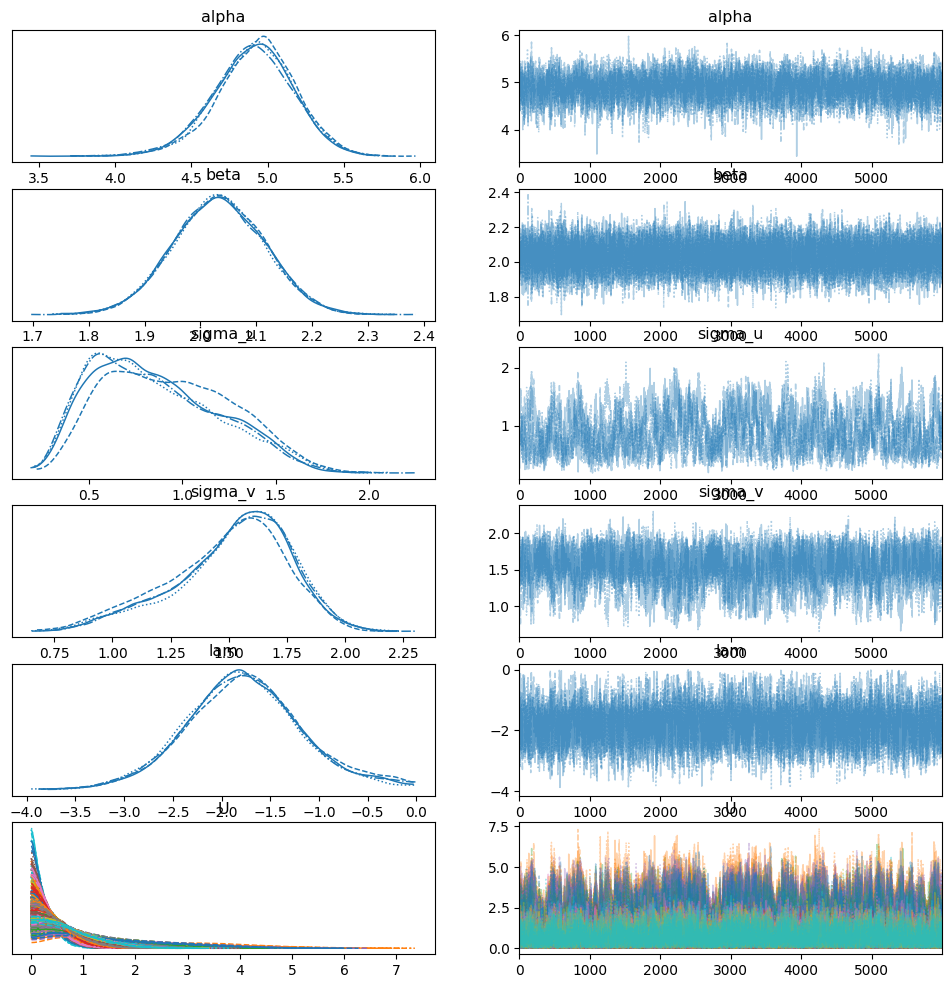

In [40]:
np.random.seed(123)

# Parameters 
n = 200
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -1.5

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

n = 500

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 69 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.75  0.28    4.20     5.25       0.01     0.00   1715.35   5266.20   
beta     1.91  0.05    1.82     2.01       0.00     0.00  32590.09  17784.85   
sigma_u  0.75  0.24    0.32     1.20       0.01     0.01    299.78    814.61   
sigma_v  1.32  0.16    1.02     1.62       0.01     0.00    860.90   1757.26   
lam     -1.02  0.43   -1.79    -0.15       0.01     0.00   6077.75   9585.05   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[495]   0.38  0.31    0.00     0.95       0.00     0.00   7689.79  11170.96   
U[496]   0.61  0.47    0.00     1.46       0.01     0.01   1996.01   6515.19   
U[497]   0.44  0.35    0.00     1.07       0.01     0.00   4387.45  11378.52   
U[498]   0.70  0.53    0.00     1.66       0.01     0.01   1481.50   5038.68   
U[499]   0.88  0.64    0.00     2.03       0.02     0.01   1064.64   3496.74   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.00  
lam       1.00  
...        ...  
U[495]    1.00  
U[496]    1.00  
U[497]    1.00  
U[498]    1.00  
U[499]    1.00  

[505 rows x 9 columns]

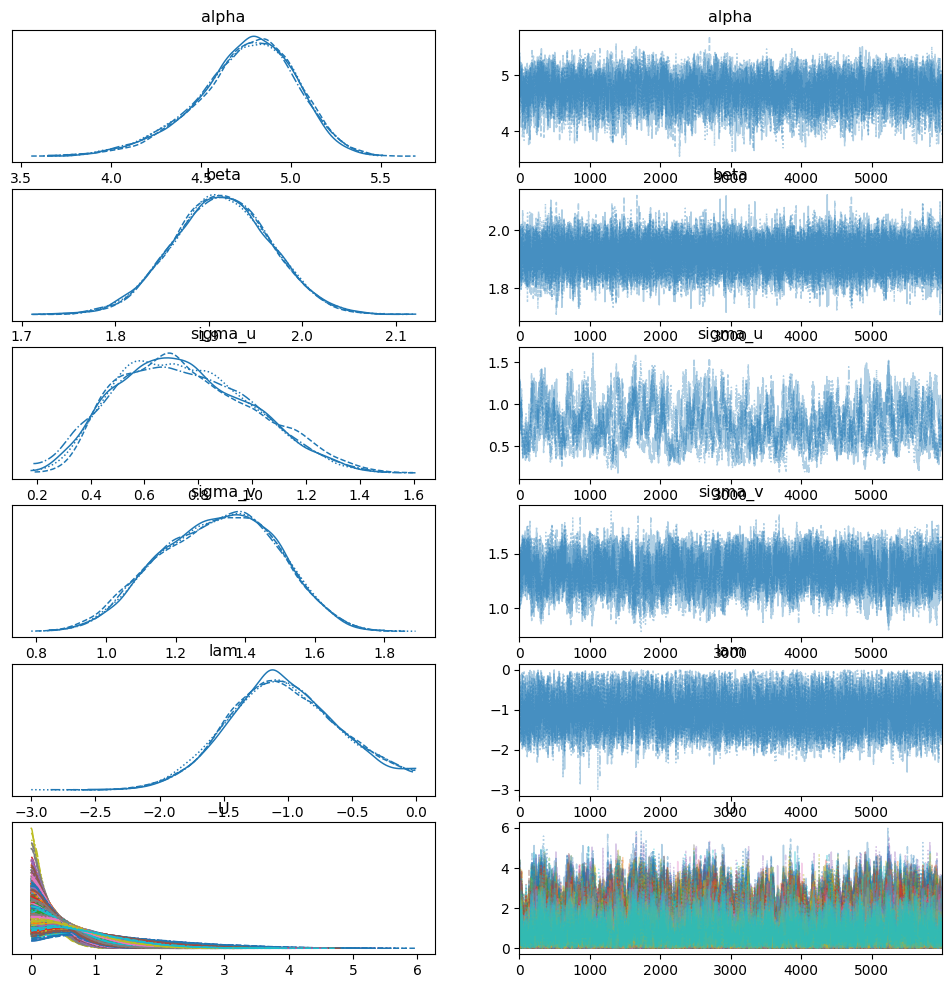

In [41]:
np.random.seed(123)

# Parameters 
n = 500
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -1.5

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

# Simulation 4

$$ \lambda = -2 $$

n = 50

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 18 seconds.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.29  0.53    3.29     5.25       0.01     0.00   4165.59   8255.14   
beta     2.27  0.16    1.96     2.58       0.00     0.00  22286.65  17416.63   
sigma_u  0.85  0.37    0.29     1.57       0.01     0.01   1658.12   3306.93   
sigma_v  1.61  0.31    1.05     2.20       0.00     0.00   5172.88   5754.47   
lam     -1.19  0.67   -2.31    -0.01       0.01     0.00   9139.05   9803.12   
U[0]     0.60  0.50    0.00     1.51       0.01     0.01   6264.86   9669.02   
U[1]     1.01  0.83    0.00     2.58       0.02     0.01   3002.16   5656.88   
U[2]     1.00  0.82    0.00     2.53       0.02     0.01   3043.03   5451.35   
U[3]     1.26  1.04    0.00     3.20       0.02     0.02   2428.56   4611.60   
U[4]     0.32  0.29    0.00     0.83       0.00     0.00  16898.65  11585.31   
U[5]     0.56  0.47    0.00     1.42       0.01     0.00   6651.33   9513.05   
U[6]     0.40  0.35    0.00     1.03       0.00     0.00  12259.25  12049.47   
U[7]     0.92  0.76    0.00     2.36       0.01     0.01   3325.36   5804.01   
U[8]     0.53  0.45    0.00     1.36       0.01     0.00   6912.89   8524.16   
U[9]     0.78  0.64    0.00     1.95       0.01     0.01   3524.48   7173.97   
U[10]    0.53  0.45    0.00     1.36       0.00     0.00   7751.18   9781.24   
U[11]    0.73  0.60    0.00     1.86       0.01     0.01   4427.11   8421.04   
U[12]    0.62  0.51    0.00     1.55       0.01     0.01   6162.28   9921.12   
U[13]    0.53  0.45    0.00     1.35       0.01     0.00   6474.46   7928.74   
U[14]    0.65  0.54    0.00     1.64       0.01     0.01   4511.74   7555.10   
U[15]    0.63  0.52    0.00     1.58       0.01     0.01   5772.08   9505.35   
U[16]    0.93  0.78    0.00     2.39       0.01     0.01   3194.70   6076.83   
U[17]    0.43  0.38    0.00     1.12       0.00     0.00  11530.35  10803.14   
U[18]    0.98  0.82    0.00     2.52       0.02     0.01   2977.28   5962.07   
U[19]    0.76  0.62    0.00     1.92       0.01     0.01   4110.32   8221.02   
U[20]    0.41  0.36    0.00     1.08       0.00     0.00  10741.08   8631.48   
U[21]    0.63  0.53    0.00     1.60       0.01     0.01   4966.65   8278.14   
U[22]    0.60  0.51    0.00     1.53       0.01     0.01   5355.13   8470.16   
U[23]    0.70  0.58    0.00     1.74       0.01     0.01   4325.22   7698.31   
U[24]    0.90  0.75    0.00     2.32       0.01     0.01   3276.40   5754.49   
U[25]    0.72  0.60    0.00     1.84       0.01     0.01   4230.32   8161.14   
U[26]    0.57  0.47    0.00     1.43       0.01     0.00   6169.23   8405.24   
U[27]    0.49  0.42    0.00     1.26       0.00     0.00   7732.33   8919.93   
U[28]    0.61  0.51    0.00     1.54       0.01     0.01   6187.76   9670.11   
U[29]    0.69  0.57    0.00     1.74       0.01     0.01   4671.00   8377.17   
U[30]    0.74  0.60    0.00     1.85       0.01     0.01   3991.82   7669.26   
U[31]    0.75  0.63    0.00     1.92       0.01     0.01   4053.98   7813.16   
U[32]    0.88  0.73    0.00     2.24       0.01     0.01   3280.96   6484.82   
U[33]    0.56  0.46    0.00     1.41       0.01     0.00   6575.05  10342.75   
U[34]    0.65  0.54    0.00     1.66       0.01     0.01   5417.55   9089.34   
U[35]    0.93  0.76    0.00     2.35       0.01     0.01   3168.80   6546.30   
U[36]    0.50  0.42    0.00     1.27       0.00     0.00   8354.71   9470.18   
U[37]    1.11  0.91    0.00     2.83       0.02     0.01   2689.50   4721.49   
U[38]    1.02  0.84    0.00     2.63       0.02     0.01   2895.66   4822.91   
U[39]    0.51  0.43    0.00     1.30       0.00     0.00   7559.63   9111.33   
U[40]    0.67  0.56    0.00     1.71       0.01     0.01   4571.53   8832.75   
U[41]    0.51  0.43    0.00     1.29       0.00     0.00   8373.00  10475.79   
U[42]    0.58  0.48    0.00     1.46       0.01     0.00   5931.95   9817.16   
U[43]    0.63  0.52    0.00     1.59       0.01     0.01   5361.26   9697.65   
U[44]    

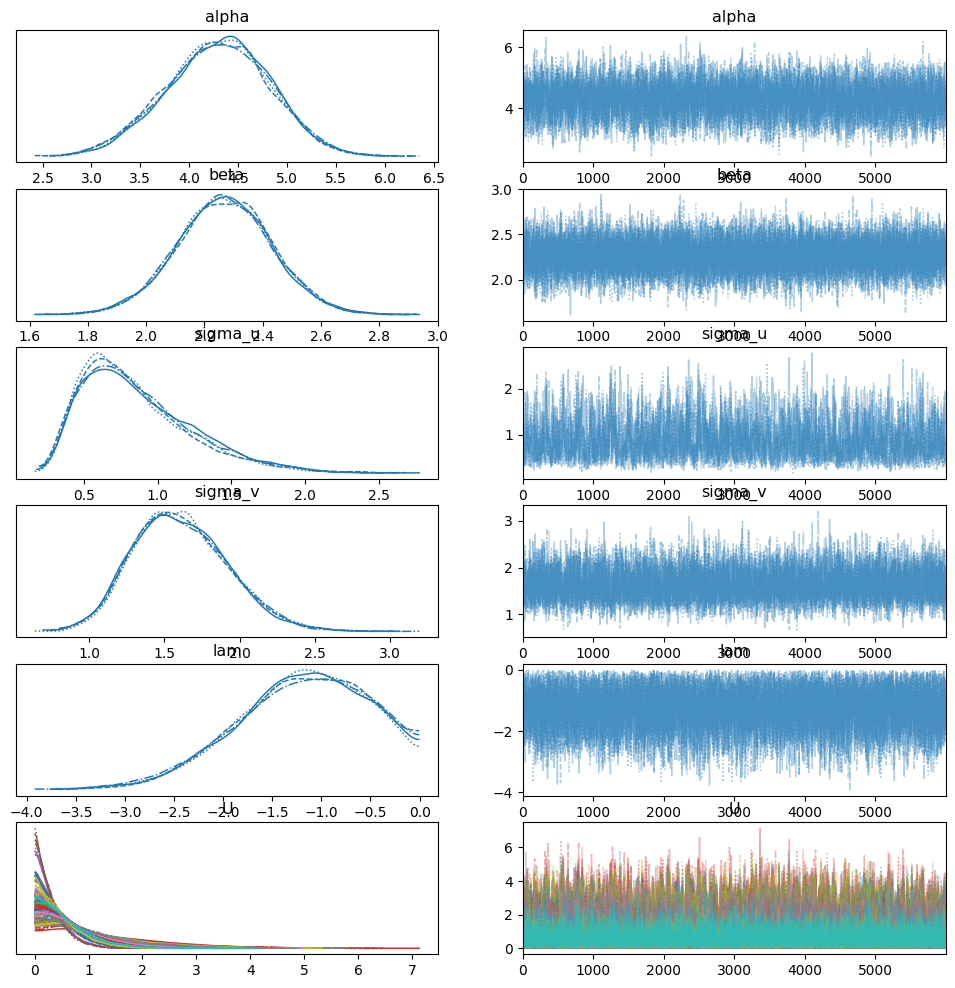

In [8]:
np.random.seed(123)

# Parameters 
n = 50
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -1.5

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-1.5, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

$$ f(x \mid \alpha, \beta) =
       \frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{-\alpha - 1}
       \exp\left(\frac{-\beta}{x}\right)$$

In [ ]:
pm.Gamma()

$$ f(x \mid \alpha, \beta) =
       \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$

n = 100

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 30 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    5.08  0.30    4.50     5.61       0.01     0.00   1986.74   7717.17   
beta     1.99  0.09    1.81     2.16       0.00     0.00  15434.69  16459.95   
sigma_u  0.91  0.36    0.33     1.58       0.02     0.01    587.05   1404.64   
sigma_v  1.41  0.27    0.89     1.89       0.01     0.00   1012.23   1530.31   
lam     -2.03  0.79   -3.55    -0.54       0.01     0.01   8169.49   8030.89   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[95]    1.48  1.10    0.00     3.55       0.04     0.02    845.46   2404.33   
U[96]    1.08  0.79    0.00     2.52       0.02     0.01   1228.08   3803.55   
U[97]    0.44  0.35    0.00     1.08       0.00     0.00   5975.15   8618.80   
U[98]    0.47  0.37    0.00     1.13       0.01     0.00   4986.14   8740.38   
U[99]    0.59  0.45    0.00     1.40       0.01     0.00   3408.06   6347.11   

         r_hat  
alpha     1.01  
beta      1.00  
sigma_u   1.02  
sigma_v   1.01  
lam       1.00  
...        ...  
U[95]     1.01  
U[96]     1.01  
U[97]     1.00  
U[98]     1.00  
U[99]     1.00  

[105 rows x 9 columns]

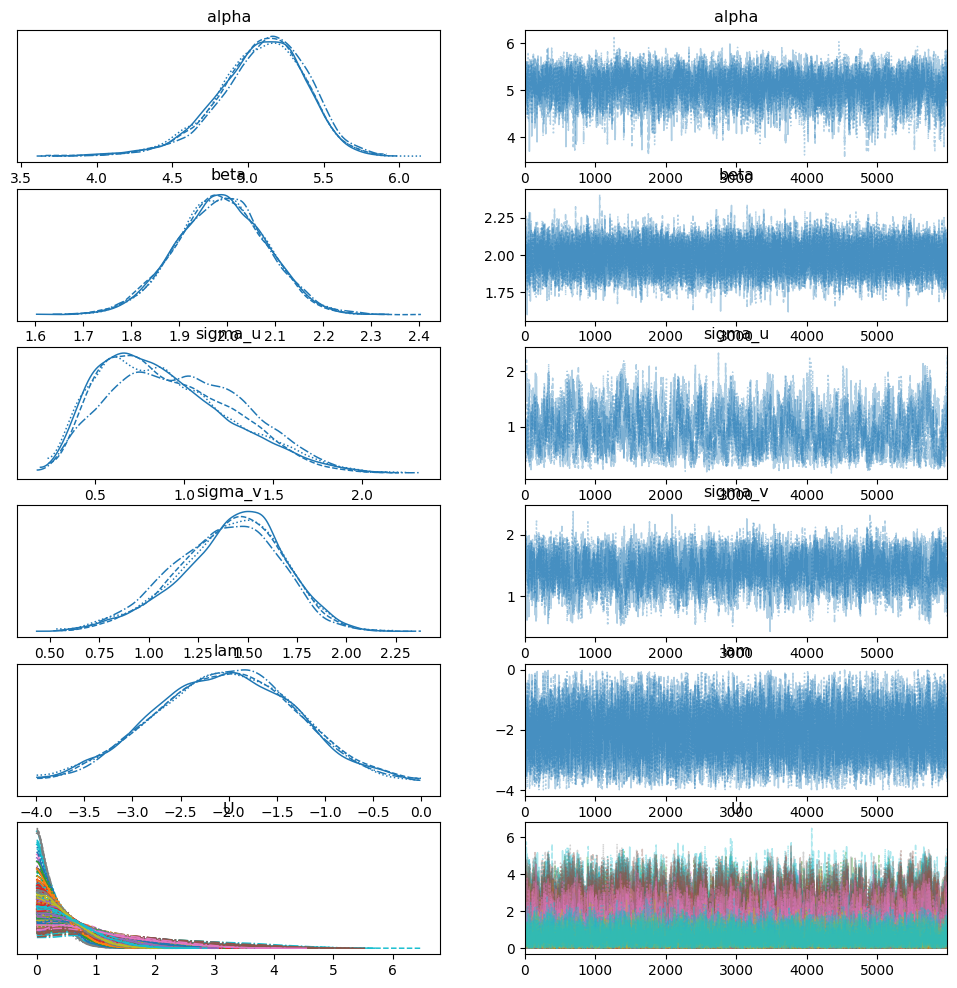

In [42]:
np.random.seed(123)

# Parameters 
n = 100
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -2

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

n = 200

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 43 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.81  0.24    4.37     5.25       0.01     0.00   1482.44   5104.81   
beta     2.02  0.08    1.89     2.18       0.00     0.00  19696.94  17583.06   
sigma_u  0.84  0.33    0.30     1.44       0.02     0.01    340.57    741.47   
sigma_v  1.46  0.24    0.97     1.86       0.01     0.01    560.69    994.55   
lam     -1.94  0.62   -3.20    -0.80       0.01     0.01   2688.57   2200.22   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[195]   0.53  0.42    0.00     1.28       0.01     0.00   2692.63   7027.30   
U[196]   0.63  0.48    0.00     1.52       0.01     0.01   1626.89   4508.87   
U[197]   0.51  0.40    0.00     1.24       0.01     0.00   2840.46   8225.21   
U[198]   0.64  0.49    0.00     1.53       0.01     0.01   1575.04   5455.39   
U[199]   0.67  0.51    0.00     1.62       0.01     0.01   1787.85   4348.59   

         r_hat  
alpha      1.0  
beta       1.0  
sigma_u    1.0  
sigma_v    1.0  
lam        1.0  
...        ...  
U[195]     1.0  
U[196]     1.0  
U[197]     1.0  
U[198]     1.0  
U[199]     1.0  

[205 rows x 9 columns]

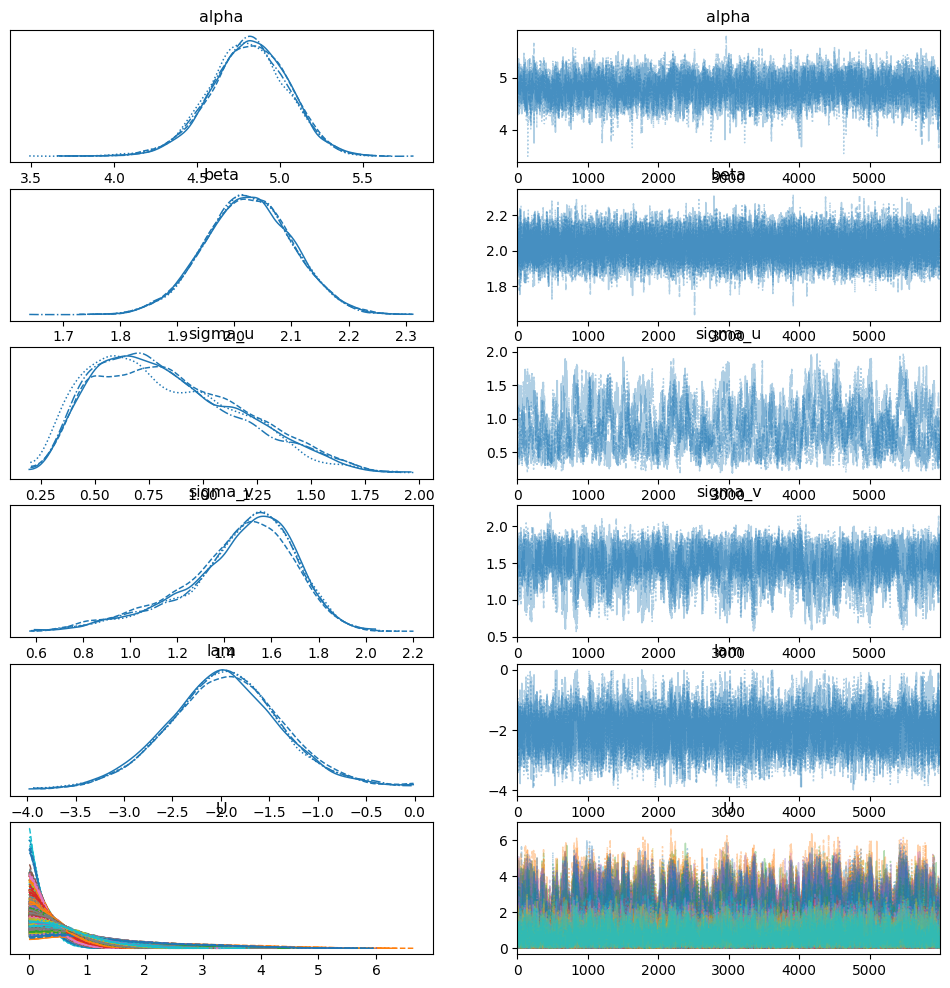

In [43]:
np.random.seed(123)

# Parameters 
n = 200
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -2

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

n = 500

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 73 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.80  0.22    4.40     5.22       0.01     0.00   1554.25   3993.65   
beta     1.92  0.05    1.83     2.02       0.00     0.00  33034.34  18832.86   
sigma_u  0.79  0.26    0.34     1.26       0.01     0.01    310.36    777.67   
sigma_v  1.32  0.18    0.95     1.62       0.01     0.00    562.82   1133.76   
lam     -1.42  0.48   -2.32    -0.45       0.01     0.01   3210.30   3920.35   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[495]   0.37  0.30    0.00     0.91       0.00     0.00   7786.42  11335.49   
U[496]   0.70  0.52    0.00     1.64       0.01     0.01   1642.03   4942.39   
U[497]   0.42  0.34    0.00     1.04       0.00     0.00   4891.74  10514.23   
U[498]   0.70  0.51    0.00     1.64       0.01     0.01   1498.82   3777.11   
U[499]   0.99  0.70    0.00     2.26       0.03     0.01    736.77   2387.64   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.00  
lam       1.00  
...        ...  
U[495]    1.00  
U[496]    1.00  
U[497]    1.00  
U[498]    1.00  
U[499]    1.00  

[505 rows x 9 columns]

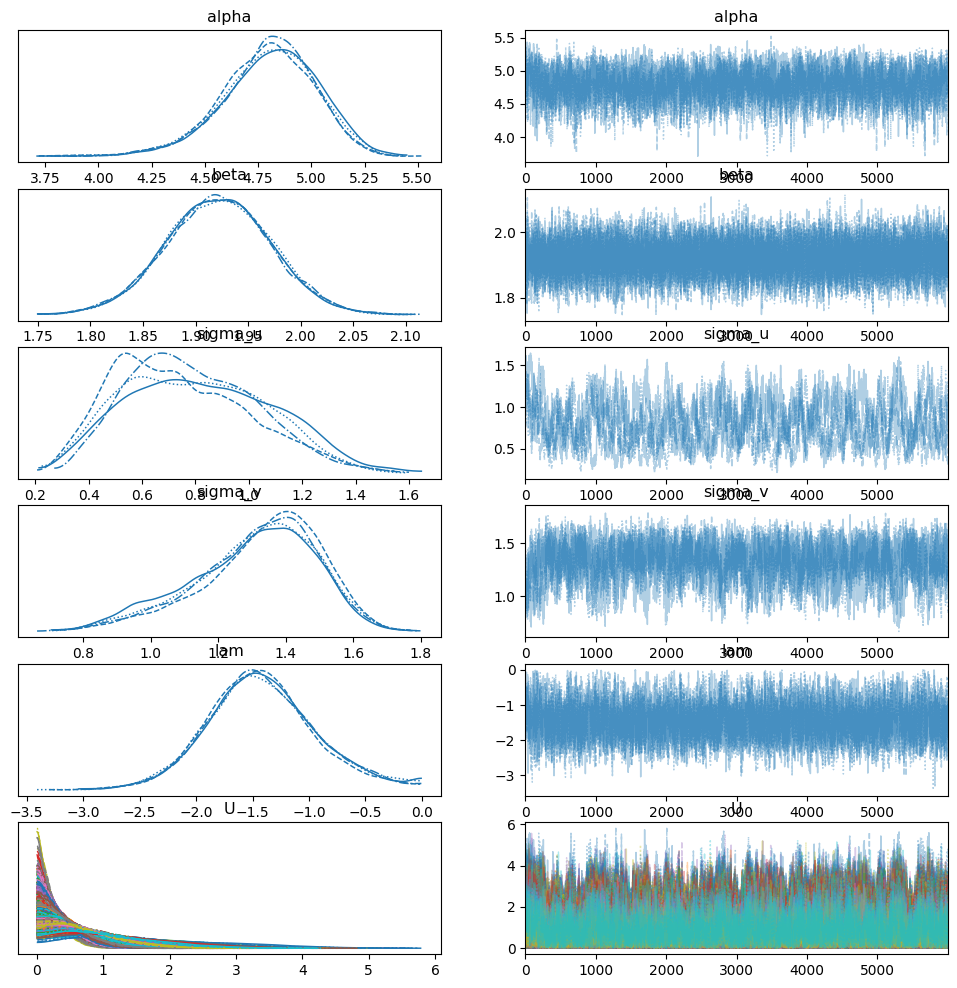

In [44]:
np.random.seed(123)

# Parameters 
n = 500
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -2

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

# Simulation 5

$$ \lambda = -5 $$

n = 50

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 22 seconds.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.81  0.27    4.30     5.32       0.01     0.00   2626.69   7554.16   
beta     2.14  0.13    1.91     2.38       0.00     0.00   9485.35  12963.94   
sigma_u  0.92  0.41    0.30     1.71       0.01     0.01   1029.52   1514.78   
sigma_v  1.76  0.33    1.10     2.39       0.01     0.01   1434.44   1176.53   
lam     -4.74  0.98   -6.56    -2.90       0.01     0.01  13595.24  11184.08   
U[0]     0.73  0.55    0.00     1.73       0.01     0.01   2757.88   6526.90   
U[1]     1.18  0.98    0.00     3.09       0.03     0.02   1600.94   2482.27   
U[2]     0.99  0.79    0.00     2.56       0.02     0.01   1816.29   3302.73   
U[3]     1.35  1.14    0.00     3.60       0.03     0.02   1426.27   2200.27   
U[4]     0.16  0.15    0.00     0.44       0.00     0.00  10610.34   8546.75   
U[5]     0.54  0.41    0.00     1.27       0.01     0.00   4691.69   6322.74   
U[6]     0.36  0.30    0.00     0.91       0.00     0.00   6394.71   7364.52   
U[7]     1.20  1.00    0.00     3.16       0.03     0.02   1542.09   2494.11   
U[8]     0.70  0.52    0.00     1.66       0.01     0.01   3081.48   7136.59   
U[9]     1.00  0.80    0.00     2.54       0.02     0.01   1859.12   3868.28   
U[10]    0.55  0.40    0.00     1.28       0.01     0.00   4245.89   6412.40   
U[11]    0.88  0.68    0.00     2.16       0.02     0.01   2151.54   4182.36   
U[12]    0.63  0.48    0.00     1.50       0.01     0.00   3607.84   6444.77   
U[13]    0.67  0.50    0.00     1.57       0.01     0.00   3200.11   5878.18   
U[14]    0.87  0.67    0.00     2.15       0.02     0.01   1976.65   4195.13   
U[15]    0.58  0.43    0.00     1.35       0.01     0.00   3621.28   6099.31   
U[16]    0.91  0.71    0.00     2.24       0.02     0.01   2073.14   4983.02   
U[17]    0.38  0.31    0.00     0.93       0.00     0.00   6121.92   6516.64   
U[18]    1.19  0.99    0.00     3.12       0.03     0.02   1527.82   2471.20   
U[19]    0.98  0.78    0.00     2.49       0.02     0.01   1948.88   4051.36   
U[20]    0.37  0.28    0.00     0.88       0.00     0.00   6338.08   7250.00   
U[21]    0.68  0.51    0.00     1.60       0.01     0.00   3184.97   6294.27   
U[22]    0.58  0.43    0.00     1.36       0.01     0.00   3682.15   5115.78   
U[23]    0.80  0.61    0.00     1.93       0.01     0.01   2394.75   4823.76   
U[24]    1.19  0.99    0.00     3.14       0.03     0.02   1532.59   2458.93   
U[25]    0.68  0.50    0.00     1.58       0.01     0.00   3225.34   7072.21   
U[26]    0.64  0.47    0.00     1.48       0.01     0.00   3663.24   8001.17   
U[27]    0.42  0.32    0.00     1.01       0.00     0.00   6414.69   7846.12   
U[28]    0.64  0.47    0.00     1.48       0.01     0.00   3897.99   7276.77   
U[29]    0.81  0.62    0.00     1.97       0.01     0.01   2684.92   4965.83   
U[30]    0.88  0.68    0.00     2.18       0.02     0.01   2204.04   4361.19   
U[31]    0.80  0.63    0.00     1.98       0.01     0.01   2335.77   4106.46   
U[32]    0.93  0.73    0.00     2.31       0.02     0.01   1895.44   3508.79   
U[33]    0.54  0.40    0.00     1.27       0.01     0.00   4068.82   6597.21   
U[34]    0.66  0.49    0.00     1.54       0.01     0.00   3387.78   6449.20   
U[35]    0.80  0.60    0.00     1.92       0.01     0.01   2617.02   5851.23   
U[36]    0.57  0.42    0.00     1.32       0.01     0.00   3768.41   6511.79   
U[37]    1.21  1.00    0.00     3.17       0.03     0.02   1516.88   2627.90   
U[38]    1.22  1.02    0.00     3.22       0.03     0.02   1559.82   2583.90   
U[39]    0.42  0.31    0.00     0.99       0.00     0.00   5419.33   7260.52   
U[40]    0.79  0.61    0.00     1.93       0.01     0.01   2759.61   6148.29   
U[41]    0.52  0.39    0.00     1.23       0.01     0.00   4218.93   7557.34   
U[42]    0.71  0.53    0.00     1.68       0.01     0.00   3187.64   7361.34   
U[43]    0.68  0.50    0.00     1.59       0.01     0.00   3168.23   7012.23   
U[44]    

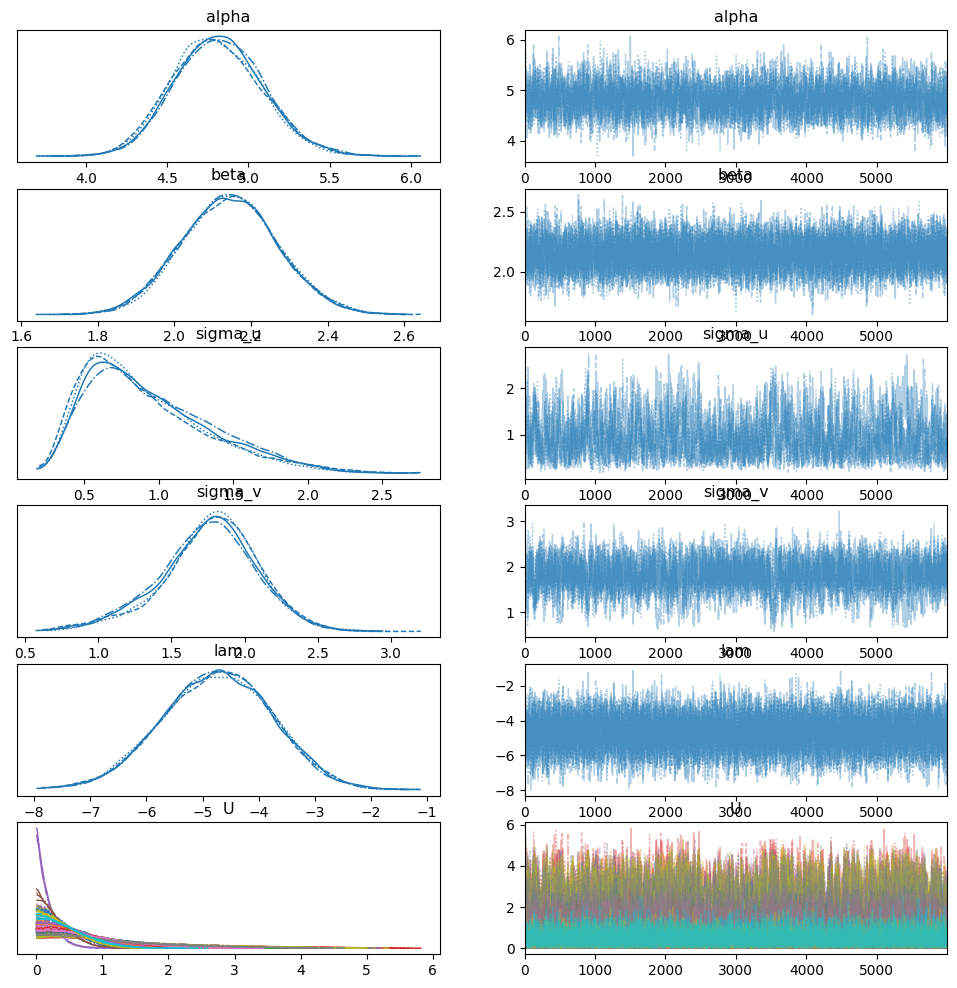

In [12]:
np.random.seed(123)

# Parameters 
n = 50
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -5

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-5, sigma=1, lower=-8, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

n = 100

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 30 seconds.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    5.10  0.30    4.52     5.64       0.01     0.00   1551.57   5493.25   
beta     1.99  0.09    1.81     2.16       0.00     0.00  11541.78  14873.14   
sigma_u  0.95  0.38    0.32     1.63       0.02     0.01    458.63   1335.92   
sigma_v  1.39  0.28    0.83     1.86       0.01     0.00    813.44   1489.01   
lam     -2.04  0.79   -3.52    -0.54       0.01     0.01   6234.86   6141.00   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[95]    1.58  1.14    0.00     3.65       0.05     0.02    672.15   2002.77   
U[96]    1.14  0.82    0.00     2.66       0.03     0.01    890.76   3744.27   
U[97]    0.45  0.35    0.00     1.09       0.00     0.00   5207.52   8837.66   
U[98]    0.48  0.37    0.00     1.16       0.01     0.00   4899.44   8006.84   
U[99]    0.60  0.45    0.00     1.42       0.01     0.00   2827.90   6535.95   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.00  
lam       1.00  
...        ...  
U[95]     1.01  
U[96]     1.00  
U[97]     1.00  
U[98]     1.00  
U[99]     1.00  

[105 rows x 9 columns]

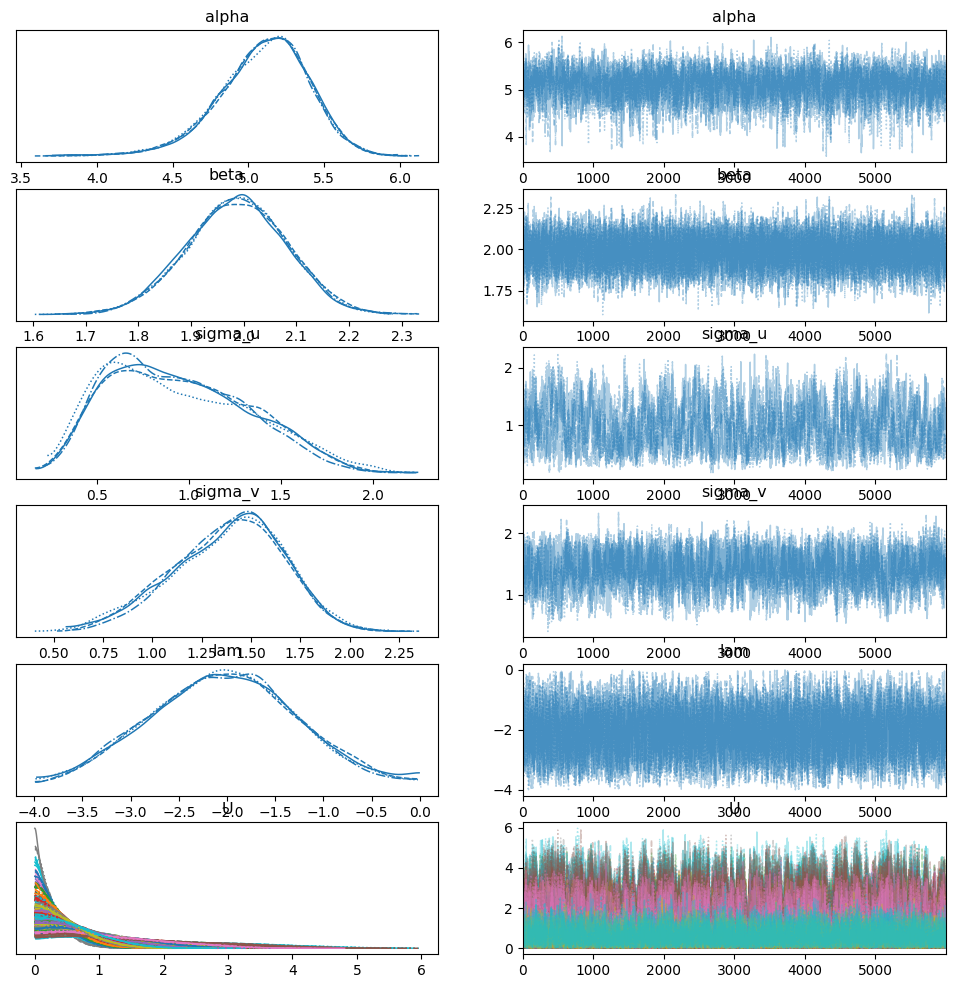

In [46]:
np.random.seed(123)

# Parameters 
n = 100
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -2

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

n = 200

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 43 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.82  0.24    4.40     5.29       0.01     0.00   1316.21   4149.31   
beta     2.02  0.08    1.88     2.17       0.00     0.00  17322.68  15314.52   
sigma_u  0.88  0.34    0.34     1.51       0.02     0.01    299.77   1039.38   
sigma_v  1.44  0.25    0.93     1.84       0.01     0.01    414.85   1136.49   
lam     -1.92  0.63   -3.17    -0.70       0.02     0.01   1707.16   2140.90   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[195]   0.55  0.43    0.00     1.33       0.01     0.01   2072.52   6031.00   
U[196]   0.66  0.50    0.00     1.55       0.01     0.01   1402.30   4741.06   
U[197]   0.54  0.41    0.00     1.29       0.01     0.00   2085.41   6382.68   
U[198]   0.66  0.50    0.00     1.58       0.01     0.01   1428.58   4602.67   
U[199]   0.71  0.53    0.00     1.67       0.02     0.01   1244.18   4224.02   

         r_hat  
alpha     1.00  
beta      1.00  
sigma_u   1.01  
sigma_v   1.01  
lam       1.00  
...        ...  
U[195]    1.00  
U[196]    1.00  
U[197]    1.00  
U[198]    1.00  
U[199]    1.00  

[205 rows x 9 columns]

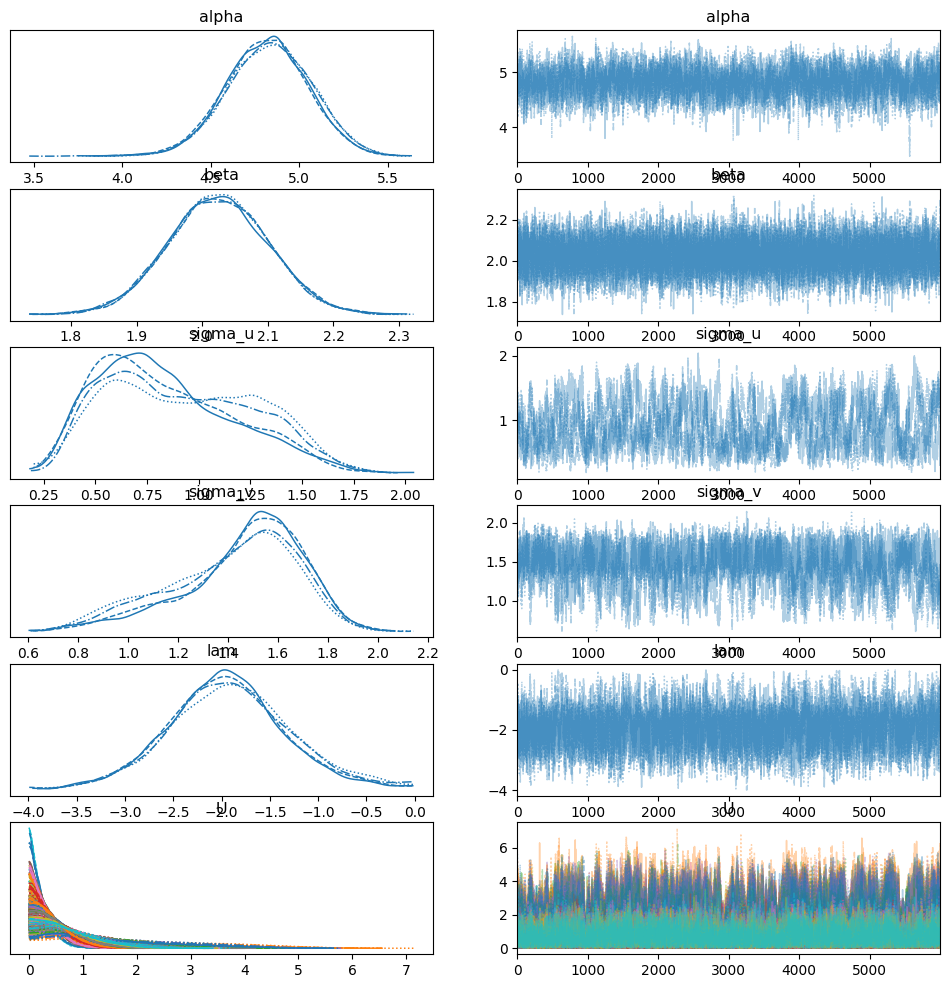

In [47]:
np.random.seed(123)

# Parameters 
n = 200
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -2

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-2, sigma=1, lower=-4, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

n = 500

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma_u, sigma_v, lam, U]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 100 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha    4.97  0.11    4.74     5.16       0.01     0.00    155.81    477.53   
beta     1.95  0.04    1.87     2.02       0.00     0.00  17366.52  17105.42   
sigma_u  0.99  0.29    0.45     1.47       0.03     0.01     79.82    332.89   
sigma_v  1.27  0.20    0.90     1.61       0.02     0.01     81.59    340.22   
lam     -3.55  0.37   -4.00    -2.88       0.00     0.00  12345.77  11728.43   
...       ...   ...     ...      ...        ...      ...       ...       ...   
U[495]   0.36  0.26    0.00     0.82       0.00     0.00   7100.75   9266.84   
U[496]   1.14  0.71    0.00     2.36       0.05     0.01    254.94   1485.48   
U[497]   0.43  0.30    0.00     0.95       0.01     0.00   3072.10   9014.16   
U[498]   0.71  0.46    0.00     1.49       0.02     0.00    909.75   7678.95   
U[499]   1.45  0.90    0.01     3.00       0.07     0.01    174.25   1171.35   

         r_hat  
alpha     1.03  
beta      1.00  
sigma_u   1.05  
sigma_v   1.05  
lam       1.00  
...        ...  
U[495]    1.00  
U[496]    1.02  
U[497]    1.00  
U[498]    1.00  
U[499]    1.03  

[505 rows x 9 columns]

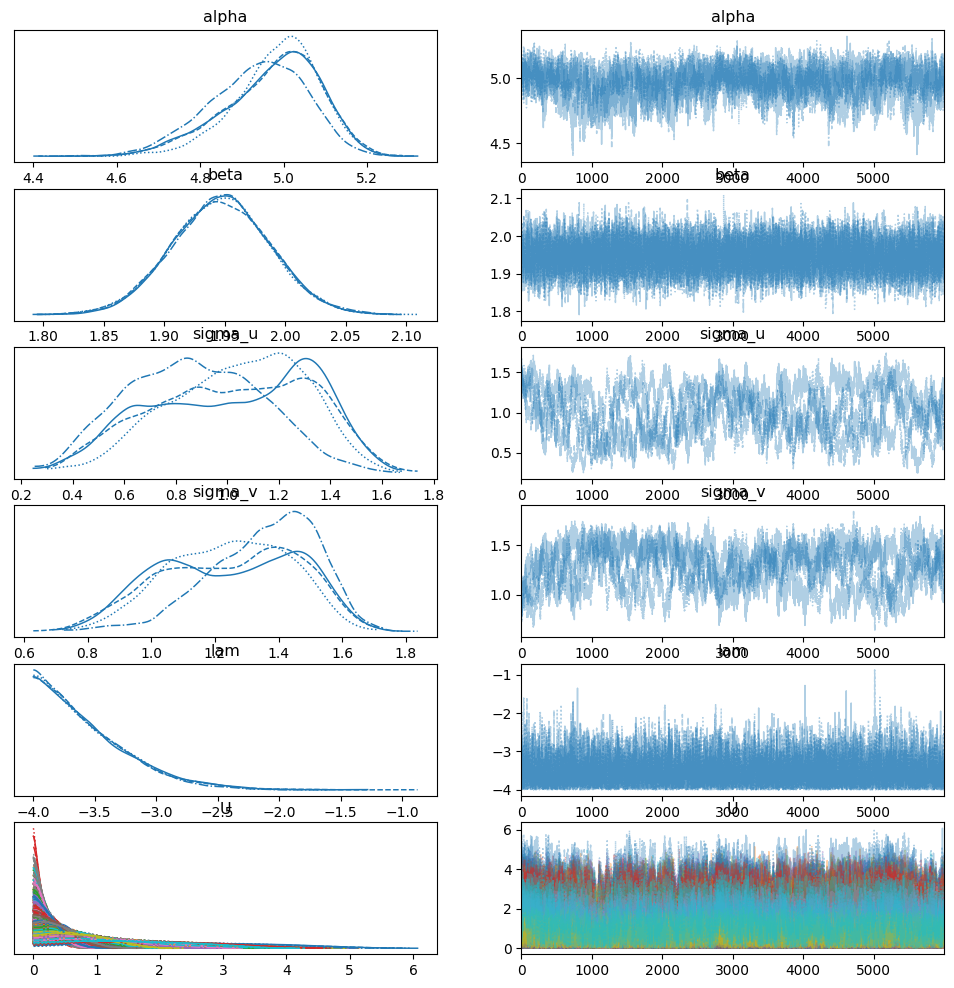

In [9]:
np.random.seed(123)

# Parameters 
n = 500
alpha = 5
beta = 2
sigma_u = 1
sigma_v = 1.5
lambda_skew = -5

# Simulate input X
X = np.random.normal(1, 1, n)

# Inefficiency term U ~ HalfNormal(0, sigma_u)
U = halfnorm(scale=sigma_u).rvs(n)

# Location ξ = α + βX − U
xi = alpha + beta * X - U

# Simulate Y ~ SkewNormal(ξ, sigma_v, lambda_skew)
Y = skewnorm(a=lambda_skew, loc=xi, scale=sigma_v).rvs(n)

# Put in DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

with pm.Model() as model:
    # Priors for parameters
    alpha_ = pm.Normal('alpha', mu=5, sigma=5)
    beta_ = pm.Normal('beta', mu=2, sigma=2)
    sigma_u = pm.InverseGamma('sigma_u', 4, 3)
    sigma_v = pm.InverseGamma('sigma_v', 2.33, 3)
    lam = pm.TruncatedNormal('lam', mu=-5, sigma=1, lower=-8, upper=0)

    # Latent inefficiency U ~ HalfNormal(0, sigma_u)
    U = pm.HalfNormal('U', sigma=sigma_u, shape=n)

    # Linear predictor with inefficiency
    mu = alpha_ + beta_ * data['X'] - U

    # Skew-Normal likelihood
    Y_obs = pm.SkewNormal('Y_obs', mu=mu, sigma=sigma_v, alpha=lam, observed=data['Y'])

    # MCMC Sampling
    trace = pm.sample(6000, tune=2000, target_accept=0.99, return_inferencedata=True)

az.plot_trace(trace)
az.summary(trace, round_to=2)

In [58]:
posterior = trace.posterior
alpha_samples = posterior['alpha']
alpha_samples

<xarray.DataArray 'alpha' (chain: 4, draw: 6000)> Size: 192kB
array([[4.94404592, 4.93854045, 4.91810132, ..., 4.66204093, 4.9037278 ,
        4.91479003],
       [4.85953537, 4.93902499, 4.78274071, ..., 4.93416601, 5.07439116,
        4.92108151],
       [4.87741939, 5.01146508, 4.97006306, ..., 4.75067655, 4.92950651,
        4.90123071],
       [5.05529635, 4.89270099, 4.83076949, ..., 4.70333152, 4.89549021,
        4.84093223]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 48kB 0 1 2 3 4 5 6 ... 5994 5995 5996 5997 5998 5999

In [60]:
posterior = trace.posterior
alpha_samples = posterior['alpha'].stack(draws=("chain", "draw")).values
beta_samples = posterior['beta'].stack(draws=("chain", "draw")).values
U_samples = posterior['U'].stack(draws=("chain", "draw")).values
X_input = data['X'].values




In [54]:
alpha_samples.shape

(24000,)

In [53]:
beta_samples.shape

(24000,)

In [57]:
U_samples.shape

(500, 24000)

In [62]:
# Compute predicted Y over all draws
Y_hat_samples = alpha_samples[:, None] + beta_samples[:, None] * X_input - U_samples.T
Y_hat_mean = Y_hat_samples.mean(axis=0)  # Bayesian Mean Prediction

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

Y_true = data['Y'].values
rmse = np.sqrt(mean_squared_error(Y_true, Y_hat_mean))
mae = mean_absolute_error(Y_true, Y_hat_mean)


In [65]:
results_df = pd.DataFrame({
    'X': X_input,
    'Y_true': Y_true,
    'Y_hat_BayesMean': Y_hat_mean,
    'Absolute_Error': np.abs(Y_hat_mean - Y_true),
    'Squared_Error': (Y_hat_mean - Y_true)**2
})


In [69]:
np.sqrt(np.mean(results_df['Squared_Error']))

1.013025915662732

In [70]:
def compute_metrics(samples, true_value):
    rmse = np.sqrt(np.mean((samples - true_value)**2))
    ave = np.mean(np.abs(samples - true_value))
    return ave, rmse

# True values
true_vals = {
    "alpha": 5,
    "beta": 2,
    "sigma_u": 1,
    "sigma_v": 1.5,
    "lam": -0.5
}

# Posterior samples (assumes you've run sampling and have `trace`)
posterior = trace.posterior.stack(draws=("chain", "draw"))
metrics = {}

for param in true_vals:
    samples = posterior[param].values
    ave, rmse = compute_metrics(samples, true_vals[param])
    metrics[param] = {"AVE": ave, "RMSE": rmse}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics).T
metrics_df

In [71]:
metrics_df

AVE      RMSE
alpha    0.118494  0.156850
beta     0.056795  0.067108
sigma_u  0.290552  0.330910
sigma_v  0.380576  0.447866
lam      2.219891  2.323806